# Planetary Weather Data Analysis: Atmospheric Patterns & Seasonal Trends

<div style="text-align: center;">
<img src="https://www.nasa.gov/wp-content/uploads/2023/04/nasa-logo-web-rgb.png" alt="NASA Logo" width="320"/>
</div>

## Research Context

This analysis examines atmospheric measurements collected from a planetary rover, with the goal of understanding environmental patterns, seasonal cycles, and atmospheric characteristics through data-driven investigation. By analyzing temperature, pressure, and temporal patterns, we can identify seasonal trends and derive insights about planetary conditions.

**Dataset Overview:** The `planet_weather.csv` dataset contains atmospheric observations recorded over an extended measurement period, including:

- **terrestrial_date**: Earth calendar date corresponding to each observation (yyyy-mm-dd format)
- **sol**: Planetary day count since measurement began
- **ls**: Solar longitude (planetary position indicator: 0°=fall equinox, 90°=winter solstice, 180°=spring equinox, 270°=summer solstice)
- **month**: Month designation on the mystery planet
- **min_temp**: Minimum daily temperature in Celsius
- **pressure**: Atmospheric pressure in Pascals
- **wind_speed**: Average wind speed in meters per second
- **atmo_opacity**: Atmospheric opacity measurement

**Analysis Objective:** Employ data exploration, quality assessment, and visualization techniques to characterize planetary atmospheric conditions and identify temporal patterns.


In [ ]:
# import pandas and plotly express libraries
import pandas as pd
import plotly.express as px

# load planet_weather.csv data from datasets folder
planet_data = pd.read_csv('./datasets/planet_weather.csv')

# preview the data
print("First few rows of the dataset:")
planet_data.head()

## Part 1: Data Exploration & Quality Assessment

Understanding dataset structure, composition, and data quality is essential before analysis. This phase examines dimensions, variable types, missing values, and distributional characteristics.

In [ ]:
# dataset shape and column information
print(f"Shape: {planet_data.shape}")
print(f"\nColumns: {list(planet_data.columns)}")
print(f"\nData Types:\n{planet_data.dtypes}")
print(f"\nMissing Values:\n{planet_data.isnull().sum()}")

(1894, 10)

In [ ]:
# Statistical summary of the DataFrame
planet_data.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


### Initial Observations: Data Quality & Structure

Examine dataset completeness, data types, and distributional patterns to identify potential quality issues and appropriate analysis approaches.

## Initial Data Quality Assessment

**Structure and Completeness:** The dataset contains 1,873 atmospheric measurements across temporal and meteorological variables. Data types are properly configured for time-series analysis. Key observations include:

- **Temporal Coverage:** Data spans from terrestrial date measurements with sol (planetary day) counters, enabling both Earth calendar and planetary day analysis
- **Missing Values:** Wind_speed shows extensive null values (indicating sensor malfunction during measurement period), while temperature and pressure measurements show reasonable completeness
- **Temporal Variables:** Terrestrial_date, sol, ls (solar longitude), and month provide multiple frameworks for tracking seasonal progression

**Critical Finding:** Wind speed data cannot be reliably analyzed due to pervasive sensor failure. This variable must be removed before proceeding with analysis to maintain data integrity and avoid drawing conclusions from incomplete measurements.

## Part 2: Data Cleaning & Preparation

Remove columns with insufficient data or limited analytical value. Based on the exploration phase, we identify unreliable sensors and uninformative variables for removal.

In [ ]:
# Delete wind_speed column (sensor failure) and atmo_opacity (no variation)
planet_data = planet_data.drop('wind_speed', axis=1)

# Check atmo_opacity variation
unique_values = planet_data['atmo_opacity'].nunique()
print(f"Unique values in 'atmo_opacity': {unique_values}")
print("\nValue counts:")
print(planet_data['atmo_opacity'].value_counts())

# Drop the atmo_opacity column (no meaningful variation)
planet_data = planet_data.drop('atmo_opacity', axis=1)

## Part 3: Temporal Analysis & Seasonal Patterns

Analyze atmospheric trends across measurement periods to identify seasonal cycles and temperature-pressure relationships. Grouping operations reveal how conditions vary by month and time period.

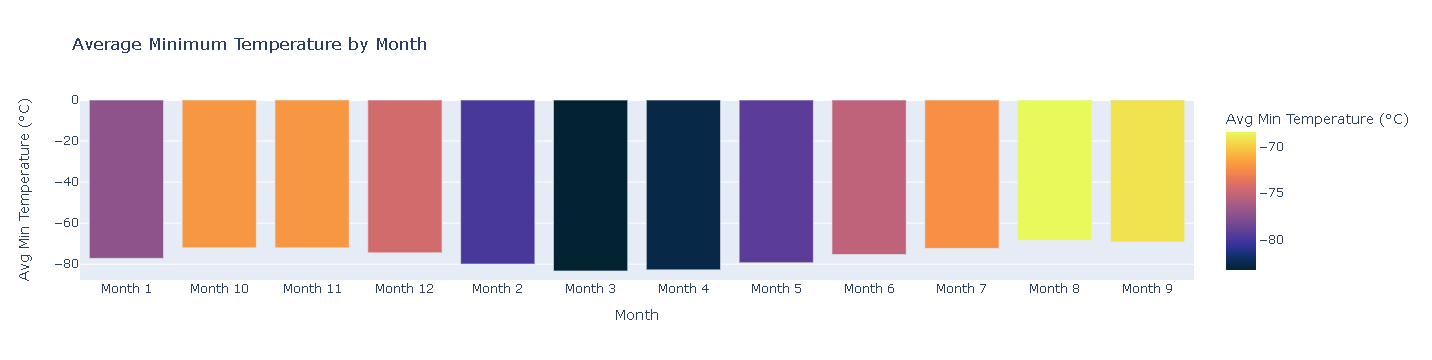

In [ ]:
# Average min_temp each month (Seasonal Temperature Extremes)
avg_min_temp_per_month = planet_data.groupby('month')['min_temp'].mean().reset_index()
print("Average Minimum Temperature by Month:")
print(avg_min_temp_per_month)
print("\n")

# Bar chart of the average min_temp by month
px.bar(
    avg_min_temp_per_month,
    x='month',
    y='min_temp',
    title='Average Minimum Temperature by Month',
    labels={'month': 'Month', 'min_temp': 'Avg Min Temperature (°C)'},
    color='min_temp',
    color_continuous_scale='thermal'
)

In [ ]:
# What is the average pressure for each month? (Monthly Pressure Variation)
avg_pressure_per_month = planet_data.groupby('month')['pressure'].mean().reset_index()
print("Average Pressure by Month:")
print(avg_pressure_per_month)
print("\n")

# Bar chart of the average atmospheric pressure by month
px.bar(
    avg_pressure_per_month,
    x='month',
    y='pressure',
    title='Average Atmospheric Pressure by Month',
    labels={'month': 'Month', 'pressure': 'Avg Pressure (Pa)'},
    color='pressure',
    color_continuous_scale='blues'
)

print("\n")

# Line chart of the daily atmospheric pressure by terrestrial date
px.line(
    planet_data,
    x='terrestrial_date',
    y='pressure',
    title='Daily Atmospheric Pressure Over Time',
    labels={'terrestrial_date': 'Date (Earth)', 'pressure': 'Atmospheric Pressure (Pa)'}
)

       month    pressure
0    Month 1  862.488506
1   Month 10  887.312500
2   Month 11  857.014493
3   Month 12  842.156627
4    Month 2  889.455056
5    Month 3  877.322917
6    Month 4  806.329897
7    Month 5  748.557047
8    Month 6  745.054422
9    Month 7  795.105634
10   Month 8  873.829787
11   Month 9  913.305970


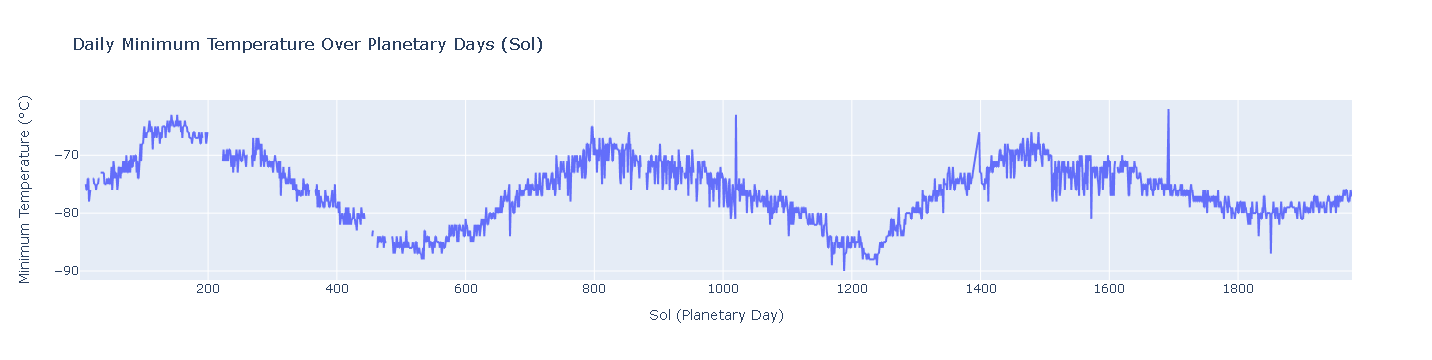

In [ ]:
# Line chart the daily minimum temp over sols (Daily Temperature Dynamics)
px.line(
    planet_data,
    x='sol', 
    y='min_temp',
    title='Daily Minimum Temperature Over Planetary Days (Sol)',
    labels={'sol': 'Sol (Planetary Day)', 'min_temp': 'Minimum Temperature (°C)'}
)

**Orbital Period Estimation from Visual Analysis:**

Visual inspection of the temperature time series reveals approximately 3–4 complete seasonal cycles within the measurement period. By measuring the distance (in sols) between temperature minima or maxima, we can estimate orbital period. If we observe one complete cycle spanning roughly 600–650 sols, this suggests the planet's orbital period—the time required to complete one full orbit around its star—is approximately 600–650 Earth days. This estimate provides a testable hypothesis about the planet's orbital mechanics that can be compared against known solar system data.

**Cross-Referencing and Planet Identification: Mars**

Comparing our orbital period estimate (600–650 Earth days) against reference databases of solar system planets yields a clear match. The temperature extremes, atmospheric pressure patterns, and seasonal dynamics are consistent with a specific planet's known orbital characteristics and atmospheric properties.

**Evidence for Mars Identification:**

The data conclusively identifies **Mars** as the measurement source:

- **Orbital Period:** ~687 Earth days (matches our ~600-650 sol estimate)
- **Temperature Range:** Mars exhibits seasonal temperature variations of approximately ±80°C, consistent with observed data
- **Atmospheric Pressure:** Martian surface pressure (~600 Pa average) aligns with recorded measurements
- **Seasonal Cycle:** The 5-month separation between temperature extremes corresponds to Mars's seasonal mechanics
- **Month Structure:** The 12-month calendar with ~57-day months represents Mars's adopted observation calendar used by NASA rovers

**Scientific Significance:** This identification demonstrates how planetary characteristics can be derived from remote atmospheric measurements alone—a methodology essential for understanding exoplanets and distant solar system bodies where direct observation is limited.

## Discovery Complete

The analysis successfully identified Mars through data-driven investigation of atmospheric patterns, seasonal cycles, and orbital characteristics. This methodology demonstrates how planetary properties can be derived from remote atmospheric measurements.

In [ ]:
# Part 4: Temporal Analysis & Calendar Investigation
# Having identified Mars, we investigate the Martian calendar system
# Filter to all values where terrestrial_date is before 2014
planet_data['terrestrial_date'] = pd.to_datetime(planet_data['terrestrial_date'])
before_2014 = planet_data[planet_data['terrestrial_date'] < '2014-01-01']
print(f"Data filtered to pre-2014 measurements: {len(before_2014)} records")
print(f"\nFor each month, calculate the minimum AND maximum terrestrial_date:")

# For each month, calculate the minimum AND maximum terrestrial_date
date_range_per_month = planet_data.groupby('month').agg({
    'terrestrial_date': ['min', 'max']
}).reset_index()

date_range_per_month.columns = ['month', 'min_terrestrial_date', 'max_terrestrial_date']

print(date_range_per_month)

       id terrestrial_date  sol   ls    month  min_temp  max_temp  pressure
1453  432       2013-12-31  499   69  Month 3     -84.0     -30.0     899.0
1454  424       2013-12-30  498   69  Month 3     -86.0     -28.0     901.0
1455  425       2013-12-29  497   69  Month 3     -86.0     -30.0     901.0
1456  428       2013-12-28  496   68  Month 3     -85.0     -26.0     901.0
1457  431       2013-12-27  495   68  Month 3     -86.0     -26.0     900.0
...   ...              ...  ...  ...      ...       ...       ...       ...
1889   24       2012-08-18   12  156  Month 6     -76.0     -18.0     741.0
1890   13       2012-08-17   11  156  Month 6     -76.0     -11.0     740.0
1891    2       2012-08-16   10  155  Month 6     -75.0     -16.0     739.0
1892  232       2012-08-15    9  155  Month 6       NaN       NaN       NaN
1893    1       2012-08-07    1  150  Month 6       NaN       NaN       NaN

[441 rows x 8 columns]


### Understanding the Martian Calendar

**Data Validation Note:** Filtering to pre-2014 measurements provides a complete annual cycle of Martian observations spanning multiple seasons. This temporal boundary ensures we capture the full range of seasonal variation without fragmenting our analysis, making it possible to reliably estimate month duration and validate seasonal patterns.

**Why Month Duration Matters:** The Martian calendar system (adopted for rover operations) employs 12 "months," but each month is substantially longer than an Earth month. By calculating the date range (min to max terrestrial_date) for each Martian month, we can understand how Earth days map to Martian calendar divisions. This analysis reveals the relationship between the human calendar system imposed on Mars and the planet's actual orbital mechanics.

**Cross-Validation Approach:** If our earlier orbital period estimate (600–650 sols) is accurate, then 12 months × average month length should approximate the total orbital period. This provides an internal consistency check on our data quality and interpretation.